In [1]:
##############################################################################
#                           NN - BASICS
##############################################################################

########## TABLE OF CONTENTS #############
# 1. DATA READ IN
# 2. DATA QUALITY CHECK
# 3. PRE MODEL TRAINING
# 4. MODEL TRAINING
################################################################################

# Visualization
import matplotlib as mpl   
import matplotlib.pyplot as plt
import pandas as pd

# Building the network 
import numpy as np

# Progress Bar
import tqdm as tqdm

import warnings
warnings.filterwarnings("ignore") #supresses warnings

1. DATA READ IN

In [13]:
df = pd.read_csv("Heart.txt", index_col=0)
df

df['TrainTestFlag'] = 0
df.iloc[pd.Series(df.index).sample(frac=0.5, random_state=1234), df.columns.get_loc('TrainTestFlag')] = 1
print("Train vs Test sample")
print(df['TrainTestFlag'].value_counts())
print("")
print(df['chd'].value_counts())
print("")
df.shape
df.info()


# sbp		systolic blood pressure
# tobacco	cumulative tobacco (kg)
# ldl		low densiity lipoprotein cholesterol
# adiposity
# famhist	family history of heart disease (Present, Absent)
# typea		type-A behavior
# obesity
# alcohol	current alcohol consumption
# age		age at onset
# chd		response, coronary heart disease  -> TARGET VARIABLE

Train vs Test sample
TrainTestFlag
0    231
1    231
Name: count, dtype: int64

chd
0    302
1    160
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 1 to 463
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sbp            462 non-null    int64  
 1   tobacco        462 non-null    float64
 2   ldl            462 non-null    float64
 3   adiposity      462 non-null    float64
 4   famhist        462 non-null    object 
 5   typea          462 non-null    int64  
 6   obesity        462 non-null    float64
 7   alcohol        462 non-null    float64
 8   age            462 non-null    int64  
 9   chd            462 non-null    int64  
 10  TrainTestFlag  462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.3+ KB


2. DATA _PREPARATION

In [14]:
df['familiarity'] = np.where(df['famhist'] == "Absent",0,np.where(df['famhist'] == "Present",1,-1))

df = df.drop(columns=['famhist'], axis=1)
X_train = df.drop('chd', inplace=False, axis=1) #remove 'target' column from input features
y_train = df['chd'] #stores target (1 or 0) in a separate array

#since we shuffled, the index numbers were messed up, this resets them
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True)

#convert to numpy arrays with float values
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=float)

#reshape y_train to make matrix multiplication possible
y_train = np.array(y_train).reshape(-1, 1)

3. PRE MODEL TRAINING

In [15]:
class Perceptron:
    def __init__(self, x, y):

        self.input = np.array(x, dtype=float) 
        self.label = np.array(y, dtype=float)
        self.weights = np.random.rand(x.shape[1], y.shape[1]) #randomly initialize the weights
        self.z = self.input@self.weights #dot product of the vectors
        self.yhat = self.sigmoid(self.z) #apply activation function

    
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def sigmoid_deriv(self, x):
        s = sigmoid(x)
        return s(1-s)

    def forward_prop(self):
        self.yhat = self.sigmoid(self.input @ self.weights) #@ symbol represents matrix multiplication (also works for vectors)
        return self.yhat

    def back_prop(self):
        gradient = self.input.T @ (-2.0*(self.label - self.yhat)*self.sigmoid(self.yhat))  #self.input is the x value

        self.weights -= gradient #process of finding the minimum loss

4. MODEL TRAINING

Final Mean Squared Error: [0.48484848]


Text(0.5, 0, 'Training Iteration')

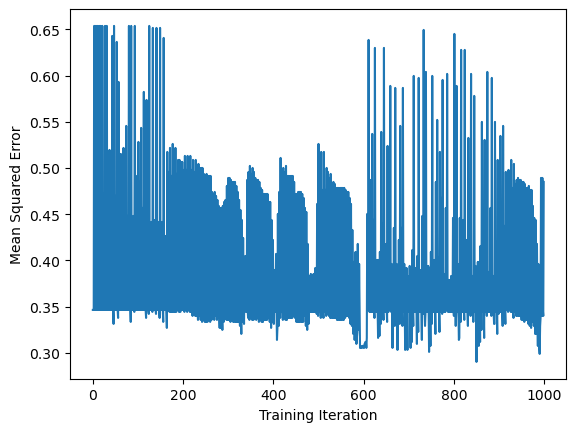

In [16]:
simple_nn = Perceptron(X_train, y_train)
training_iterations = 1000

history = [] #we will store how the mean squared error changes after each iteration in this array

def mse(yhat, y):
    sum = 0.0
    for pred, label in zip(yhat, y):
        sum += (pred-label)**2
    return sum/len(yhat)

for i in range(training_iterations):
    simple_nn.forward_prop()
    simple_nn.back_prop()
    yhat = simple_nn.forward_prop()
    history.append(mse(yhat, simple_nn.label))

    
    
yhat = simple_nn.forward_prop()




print(f'Final Mean Squared Error: {mse(yhat, simple_nn.label)}')

plt.plot(history)
plt.ylabel('Mean Squared Error')
plt.xlabel('Training Iteration')